In [1]:
import numpy as np
from scipy.stats import skew

import h5py
%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
num_intergrations = 51

In [3]:

base = h5py.File("/datag/public/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5", mode="r")


In [4]:
data_attrs = {}
for k in base["data"].attrs.keys():
    print(f"{k}    :::  {base['data'].attrs[k]}")
    data_attrs[k] = base['data'].attrs[k]

DIMENSION_LABELS    :::  ['time' 'feed_id' 'frequency']
az_start    :::  0.0
data_type    :::  1
fch1    :::  8421.38671875
foff    :::  -2.7939677238464355e-06
machine_id    :::  20
nbits    :::  32
nchans    :::  1048576
nifs    :::  1
source_name    :::  VOYAGER-1
src_dej    :::  12.403781666666667
src_raj    :::  17.211244722222222
telescope_id    :::  6
tsamp    :::  18.253611007999982
tstart    :::  59046.92634259259
za_start    :::  0.0


In [5]:
data_attrs

{'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object),
 'az_start': np.float64(0.0),
 'data_type': np.int64(1),
 'fch1': np.float64(8421.38671875),
 'foff': np.float64(-2.7939677238464355e-06),
 'machine_id': np.int64(20),
 'nbits': np.int64(32),
 'nchans': np.int64(1048576),
 'nifs': np.int64(1),
 'source_name': 'VOYAGER-1',
 'src_dej': np.float64(12.403781666666667),
 'src_raj': np.float64(17.211244722222222),
 'telescope_id': np.int64(6),
 'tsamp': np.float64(18.253611007999982),
 'tstart': np.float64(59046.92634259259),
 'za_start': np.float64(0.0)}

In [6]:
data_attrs["source_name"] = "synthetic noise"
data_attrs["tsamp"] = abs(1/(data_attrs["foff"]*1e6)) * num_intergrations

In [7]:
data_attrs

{'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object),
 'az_start': np.float64(0.0),
 'data_type': np.int64(1),
 'fch1': np.float64(8421.38671875),
 'foff': np.float64(-2.7939677238464355e-06),
 'machine_id': np.int64(20),
 'nbits': np.int64(32),
 'nchans': np.int64(1048576),
 'nifs': np.int64(1),
 'source_name': 'synthetic noise',
 'src_dej': np.float64(12.403781666666667),
 'src_raj': np.float64(17.211244722222222),
 'telescope_id': np.int64(6),
 'tsamp': np.float64(18.253611008),
 'tstart': np.float64(59046.92634259259),
 'za_start': np.float64(0.0)}

In [8]:

np.random.seed(42)


In [9]:
# r = np.float32(10*np.random.randn(16,1,2**20) + 50.0)

r = np.float32(1*np.random.randn(16,4*num_intergrations,2**20) + 0.0)
# r_im = np.float32(1*np.random.randn(16,64,2**20) + 0.0)

# r = r_re*r_re + r_im*r_im

r = (r*r).sum(1)

r = r.reshape((r.shape[0], 1, r.shape[-1]))

In [10]:

print(np.std(r, dtype=np.float32))
print(np.mean(r, dtype=np.float32))


print(skew(r.flatten()))

20.199112
204.00534
0.1981016844511032


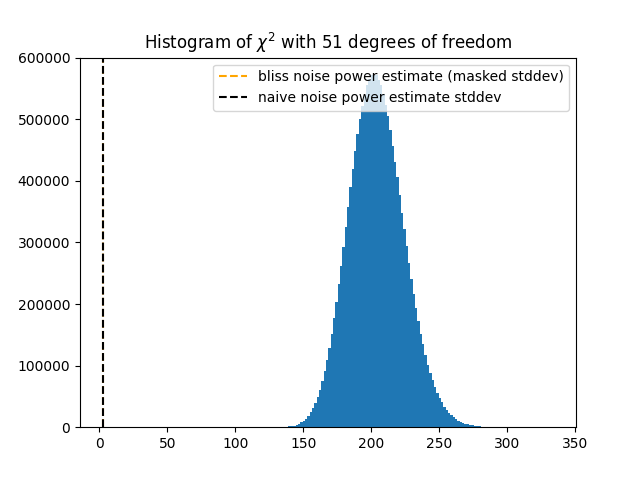

In [11]:
plt.figure()
h = plt.hist(r.sum(1).flatten(), bins=int(np.power(2**20*16,1/3)//2))
plt.title(f"Histogram of $\chi^2$ with {num_intergrations} degrees of freedom")
plt.axvline(2.4489, color='orange', linestyle='dashed')
plt.axvline(2.82, color='black', linestyle='dashed')

plt.legend(["bliss noise power estimate (masked stddev)", "naive noise power estimate stddev"])


In [12]:
ax = plt.gca()
ax.set_xlim(0, 20)

(0.0, 20.0)

In [13]:
h[1][11]

np.float64(133.94918823242188)

In [14]:
np.sum(h[0][6:11]) - 5721030.656

np.sum(h[0][11:24]) - 5721030.656

np.float64(-5628191.656)

In [15]:
h[1][5]
h[1][11]
h[1][24]

np.float64(156.35572814941406)

In [16]:
16777216.0 * .341

5721030.656

In [17]:

f = h5py.File(f"just_noise_chisq_{4*num_intergrations}dof.h5", mode="w")


In [18]:
# f.create_dataset("data", r.shape, dtype=r.dtype)
f["data"] = r


In [19]:
for k,v in data_attrs.items():
    f["data"].attrs[k] = v

In [20]:
for k in base.attrs.keys():
    f.attrs[k] = base.attrs[k]

In [21]:
f.close()